<a href="https://colab.research.google.com/github/Ziaeemehr/workshop_ML/blob/main/hyper_tuning/GA_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
import pandas as pd 
from sklearn.svm import SVC 
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

warnings.filterwarnings("ignore")

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
X = iris.data 
y = iris.target 
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
X_train.shape, X_test.shape

((60, 4), (90, 4))

In [4]:
model = SVC(C=100, kernel='rbf', gamma=10)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.9

In [5]:
import matplotlib.pyplot as plt
from sklearn_genetic import GASearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn_genetic.space import Integer, Categorical, Continuous
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space

In [8]:
model_ga = SVC()
param_grid = {'C': Continuous(0.1, 100),
              'gamma': Continuous(0.1, 10),
              'kernel': Categorical(['rbf', 'linear', 'poly', 'sigmoid'])}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
evolved_estimator = GASearchCV(estimator=model_ga, 
                               param_grid=param_grid, 
                               n_jobs=-1,
                               cv=cv,
                               elitism=True,
                               criteria='max',
                               keep_top_k=4,
                               generations=50,
                               tournament_size=5,
                               scoring='accuracy',
                               population_size=10,
                               mutation_probability=0.1,
                               crossover_probability=0.8,
                               algorithm='eaSimple',
                               )

In [9]:
evolved_estimator.fit(X_train, y_train)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.838333	0.1513     	0.933333   	0.4        
1  	6     	0.925   	0.00833333 	0.933333   	0.916667   
2  	6     	0.93    	0.00666667 	0.933333   	0.916667   
3  	4     	0.93    	0.00666667 	0.933333   	0.916667   
4  	4     	0.93    	0.00666667 	0.933333   	0.916667   
5  	4     	0.93    	0.00666667 	0.933333   	0.916667   
6  	6     	0.93    	0.00666667 	0.933333   	0.916667   
7  	4     	0.93    	0.00666667 	0.933333   	0.916667   
8  	6     	0.93    	0.00666667 	0.933333   	0.916667   
9  	6     	0.93    	0.00666667 	0.933333   	0.916667   
10 	3     	0.928333	0.00763763 	0.933333   	0.916667   
11 	6     	0.93    	0.00666667 	0.933333   	0.916667   
12 	4     	0.93    	0.00666667 	0.933333   	0.916667   
13 	4     	0.928333	0.00763763 	0.933333   	0.916667   
14 	6     	0.931667	0.005      	0.933333   	0.916667   
15 	6     	0.933333	0          	0.933333   	0.933333   
16 	6     	0.933333	0          	0.933333   	0.93

GASearchCV(algorithm='eaSimple', crossover_probability=0.8,
           cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
           estimator=SVC(C=12.640808107520865, gamma=4.708660756833203,
                         kernel='linear'),
           generations=50, keep_top_k=4, mutation_probability=0.1, n_jobs=-1,
           param_grid={'C': <sklearn_genetic.space.space.Continuous object at 0x7fc964389e80>,
                       'gamma': <sklearn_genetic.space.space.Continuous object at 0x7fc964389700>,
                       'kernel': <sklearn_genetic.space.space.Categorical object at 0x7fc964497040>},
           population_size=10, return_train_score=True, scoring='accuracy',
           tournament_size=5)

In [10]:
y_predicy_ga = evolved_estimator.predict(X_test)
accuracy_score(y_test, y_predicy_ga)

0.9777777777777777

In [11]:
evolved_estimator.best_params_

{'C': 12.640808107520865, 'gamma': 4.708660756833203, 'kernel': 'linear'}

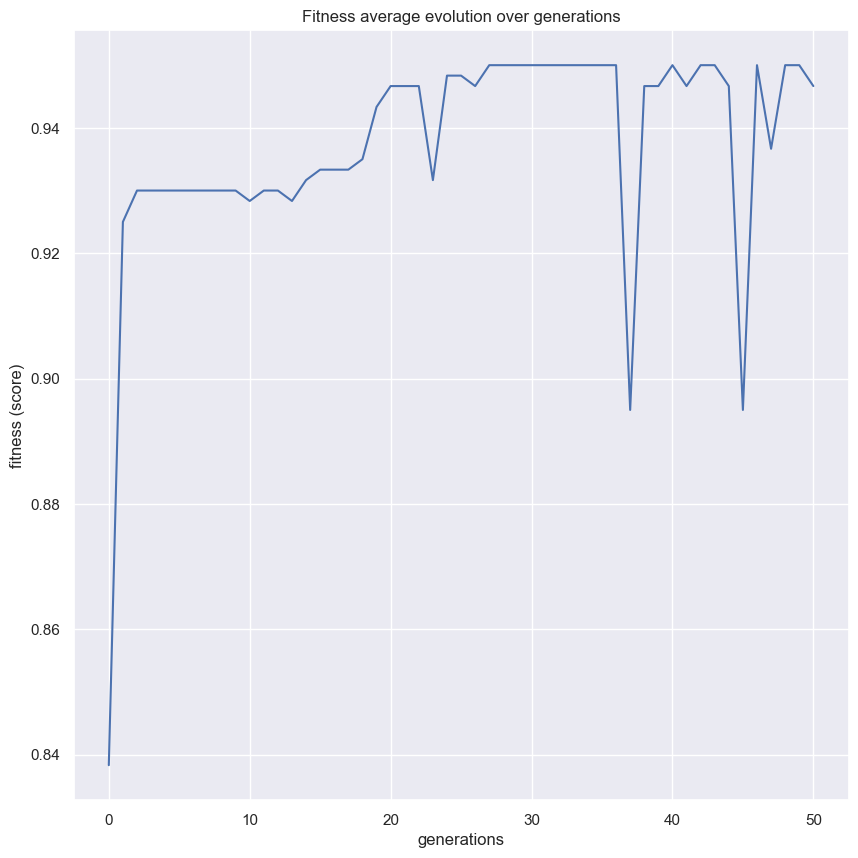

In [12]:
plot_fitness_evolution(evolved_estimator);

In [13]:
print("Parameters and cv score in each iteration:")
print(evolved_estimator.logbook)

Parameters and cv score in each iteration:
                                                                                                                                                                                   parameters                                                                                                                                                                                   
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
C      	cv_scores                                               	fit_time                                                	gamma   	index	kernel 	score   	score_time                                              	test_sco

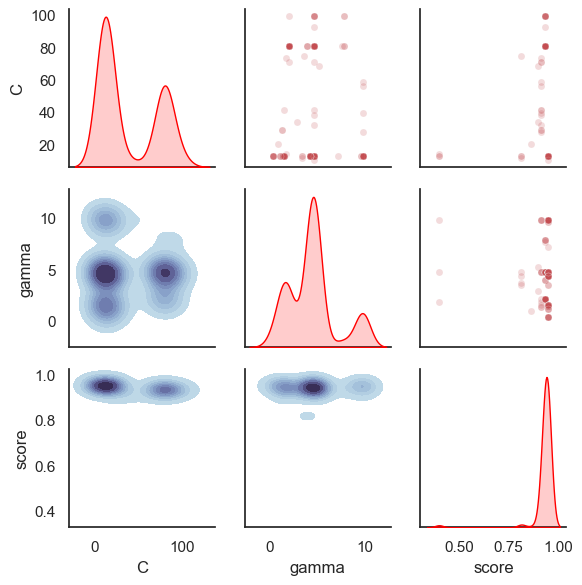

In [14]:
plot_search_space(evolved_estimator);

In [15]:
print("Best k solutions:")
evolved_estimator.hof

Best k solutions:


{0: {'C': 12.640808107520865, 'gamma': 4.708660756833203, 'kernel': 'linear'},
 1: {'C': 12.640808107520865, 'gamma': 4.318177629209189, 'kernel': 'linear'},
 2: {'C': 12.640808107520865, 'gamma': 1.5584181233971706, 'kernel': 'linear'},
 3: {'C': 12.640808107520865, 'gamma': 4.708660756833203, 'kernel': 'linear'}}